In [0]:
import math
import random
import numpy as np
import pandas as pd
from google.colab import files
from matplotlib import pyplot as plt

In [0]:
def plot_graph(dataset,numClasses = 2):
  X = dataset[:,:-1]
  y = dataset[:,-1]
  plt.figure(figsize=(8,6))
  for i in range(numClasses):
    X_cord = []
    y_cord = []
    for j in range(len(y)):
      if(y[j] == i):
        X_cord.append(X[j][0])
        y_cord.append(X[j][1])
    plt.scatter(X_cord,y_cord,s=50,marker="o",edgecolors="w")
  plt.show()

In [0]:
def addNoise(data, noise, numClasses):
  
  noise = math.ceil(noise * len(data))
  np.random.shuffle(data)
  values = np.arange(start=0, stop=numClasses,step=1,dtype="int")
  for i in range(noise):
    var = random.choice(values)
    while(var == data[i][2]):
      var = random.choice(values)
    data[i][2] = var
  return data

In [0]:
def downloadDataset(dataset):
  df = pd.DataFrame(dataset)
  df.to_csv("Generated_Dataset.csv",header=None,index=False)
  files.download("Generated_Dataset.csv")

In [0]:
def generateData(numExamples,distributionShape,numClasses = 2):
  
  numExamples = math.floor(numExamples/numClasses)
  whole_data = []
  total = numExamples
  if(distributionShape == "square"):
    numExamples = math.floor(numExamples/numClasses)

    x1 = np.random.uniform(0,5,numExamples).reshape((numExamples,1))
    y1 = np.random.uniform(0,5,numExamples).reshape((numExamples,1))

    firstwhole = np.append(arr=x1,values=y1,axis=1)
    firstwhole = np.append(arr=firstwhole,values=np.ones(shape=(numExamples,1))*0,axis=1)

    tempx1 = np.random.uniform(6,11,numExamples).reshape((numExamples,1))
    tempy1 = np.random.uniform(6,11,numExamples).reshape((numExamples,1))
    tempwhole1 = np.append(arr=tempx1,values=tempy1,axis=1)
    tempwhole1 = np.append(arr=tempwhole1,values=np.ones(shape=(numExamples,1))*0,axis=1)

    firstwhole = np.append(arr=firstwhole,values=tempwhole1,axis=0)

    x2 = np.random.uniform(6,11,numExamples).reshape((numExamples,1))
    y2 = np.random.uniform(0,5,numExamples).reshape((numExamples,1))
    secondwhole = np.append(arr=x2,values=y2,axis=1)
    secondwhole = np.append(arr=secondwhole,values=np.ones(shape=(numExamples,1)),axis=1)

    tempx2 = np.random.uniform(0,5,numExamples).reshape((numExamples,1))
    tempy2 = np.random.uniform(6,11,numExamples).reshape((numExamples,1))
    tempwhole2 = np.append(arr=tempx2,values=tempy2,axis=1)
    tempwhole2 = np.append(arr=tempwhole2,values=np.ones(shape=(numExamples,1)),axis=1)
    secondwhole = np.append(arr=secondwhole,values=tempwhole2,axis=0)

    dataset = np.append(arr=firstwhole,values=secondwhole,axis=0)

  elif(distributionShape == "spiral"):
    
    rotations = math.ceil(numExamples/63)
    a = 0.0
    b1 = 1
    b2 = -1
    theta = 0.0
    xlist1 = []
    ylist1 = []
    xlist2 = []
    ylist2 = []
    iterations = 0
    while ((theta < rotations * 2 * math.pi) and iterations < numExamples):
        radius1 = a + b1 * theta
        radius2 = a + b2 * theta
        x1, y1 = radius1 * math.cos(theta), radius1 * math.sin(theta)
        x2, y2 = radius2 * math.cos(theta), radius2 * math.sin(theta)
        xlist1.append(x1)
        ylist1.append(y1)
        xlist2.append(x2)
        ylist2.append(y2)
        theta += 0.1
        iterations += 1
    xlist1 = np.array(xlist1).reshape(-1,1)
    xlist2 = np.array(xlist2).reshape(-1,1)
    ylist1 = np.array(ylist1).reshape(-1,1)
    ylist2 = np.array(ylist2).reshape(-1,1)

    whole1 = np.append(arr=xlist1,values=ylist1,axis=1)
    whole1 = np.append(arr=whole1,values=np.ones(shape=(len(whole1),1))*0,axis=1)

    whole2 = np.append(arr=xlist2,values=ylist2,axis=1)
    whole2 = np.append(arr=whole2,values=np.ones(shape=(len(whole1),1)),axis=1)

    dataset = np.append(arr=whole1,values=whole2,axis=0)

  elif(distributionShape == "cluster"):
    gap = 0
    for i in range(numClasses):
      x1 = np.random.normal(loc=gap, scale=2, size=numExamples)
      y1 = np.random.normal(loc=gap, scale=2, size=numExamples)
      x1 = x1.reshape(len(x1),1)
      y1 = y1.reshape(len(y1),1)
      type1 = np.append(arr=x1, values=y1, axis=1)
      type1 = np.append(arr=type1,values = np.ones(shape=(numExamples,1))*i,axis=1)
      whole_data.append(list(type1))
      gap+=10
    dataset = np.array(whole_data).reshape(numExamples*numClasses,3)
    

  elif(distributionShape == "circle"):
    xCenter,yCenter = 1,1
    gap = 0
    theta = np.random.rand((numExamples)) * (2 * np.pi)
    for i in range(numClasses):
      if(i == 0):
        r1 = np.random.uniform(low=i, high=i + 1.5, size=numExamples)
      else:
        r1 = np.random.uniform(low=i+1+gap, high=i+2+gap, size=numExamples)
        gap+=1
      x1, y1 = r1 * np.cos(theta) + xCenter, r1 * np.sin(theta) + yCenter
      x1 = x1.reshape(len(x1),1)
      y1 = y1.reshape(len(y1),1)
      type1 = np.append(arr=x1, values=y1, axis=1)
      type1 = np.append(arr=type1,values = np.ones(shape=(numExamples,1))*i,axis=1)
      whole_data.append(list(type1))
    dataset = np.array(whole_data).reshape(numExamples*numClasses,3)

  return dataset

Enter the size of the dataset
1000

1) Two-class Dataset
2) Multi-class Dataset
2
Press the key for the follwing choices

a) Gaussian Clusters b) Concentric circles
b
Enter the number of distinct classes
4
Enter the probablistic noise (0-1). Press 0 if you don't wish to add noise
0.01


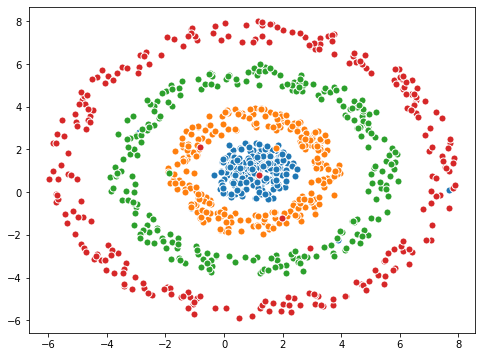

Do you want to download the dataset created?(y/n)
y
1) Create another dataset
2) QUIT
2


In [0]:
while(True):
  numExamples = int(input("Enter the size of the dataset\n"))
  firstChoice = int(input("\n1) Two-class Dataset\n2) Multi-class Dataset\n"))
  print("Press the key for the follwing choices\n")
  if(firstChoice == 1):

    secondChoice = input("a) Four-squares b) Spiral\n")
    numClasses = 2

    if(secondChoice == "a"):
      distributionShape = "square"
    elif(secondChoice == "b"):
      distributionShape = "spiral"

  elif(firstChoice == 2):

    secondChoice = input("a) Gaussian Clusters b) Concentric circles\n")
    numClasses  = int(input("Enter the number of distinct classes\n"))

    if(secondChoice == "a"):
      distributionShape = "cluster"
    elif(secondChoice == "b"):
      distributionShape = "circle"

  else:
    print("Invalid Input")

  dataset = generateData(numExamples,distributionShape,numClasses)
  noise_level = float(input("Enter the probablistic noise (0-1). Press 0 if you don't wish to add noise\n"))
  dataset = addNoise(data=dataset,noise=noise_level,numClasses=numClasses)
  plot_graph(dataset,numClasses=numClasses)

  download = input("Do you want to download the dataset created?(y/n)\n")
  if(download == "y"):
    downloadDataset(dataset)

  choice = int(input("1) Create another dataset\n2) QUIT\n"))
  if(choice==2):
    break

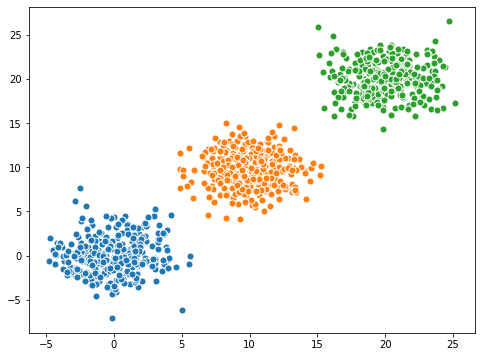

In [0]:
dataset = generateData(numExamples=1000,distributionShape="cluster",numClasses=3)
plot_graph(dataset,numClasses=3)

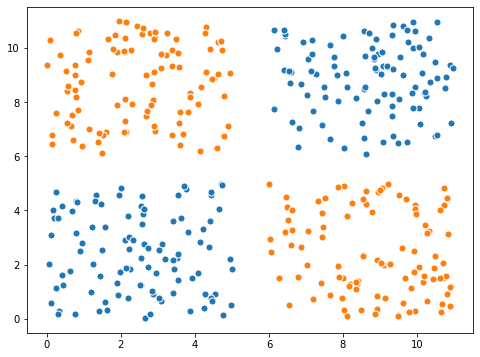

In [0]:
dataset = generateData(numExamples=400,distributionShape="square",numClasses=2)
plot_graph(dataset,numClasses=2)

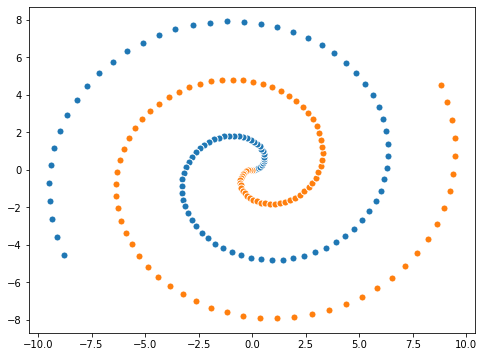

In [0]:
dataset = generateData(numExamples=200,distributionShape="spiral",numClasses=2)
plot_graph(dataset,numClasses=2)

**References**

[Neural Network Playgorund by google](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.76029&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

